In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# list all the csv files in processed_data/internal_split/train
base_dir = "processed_data/internal_split/train"

In [3]:
# combined_df = pd.DataFrame()
# first = True
# for file in os.listdir(base_dir):
#     if file.endswith(".csv") and file != "metadata.csv":
#         print(f"Merging {file}")
#         tmp_df = pd.read_csv(os.path.join(base_dir, file)).drop(columns=["surveyId"])
#         columns = tmp_df.columns.map(lambda x: file[:-4]+"_"+x)
#         print(columns)
#         combined_df.rename(columns=dict(zip(tmp_df.columns, columns)), inplace=True)
#         combined_df = pd.concat([combined_df, tmp_df], axis=1)

In [4]:
# with pd.option_context('mode.use_inf_as_na', True):
#     for column in combined_df.columns:
#         na_count = combined_df[column].isna().sum()
#         if na_count > 0:
#             print(f"{column}: {na_count} missing values")

In [4]:
metadata_df = pd.read_csv(os.path.join(base_dir, "metadata.csv"))
metadata_df.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId,speciesId_count
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874,212,16
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476,212,16
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157,212,16
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784,212,16
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530,212,16


In [8]:
metadata_df = metadata_df.replace([np.inf, -np.inf], np.nan)
for column in metadata_df.columns:
    print(f"{column}: {metadata_df.isna().sum()[column]} missing values")

lon: 0 missing values
lat: 0 missing values
year: 0 missing values
geoUncertaintyInM: 9852 missing values
areaInM2: 187625 missing values
region: 0 missing values
country: 0 missing values
speciesId: 0 missing values
surveyId: 0 missing values
speciesId_count: 0 missing values


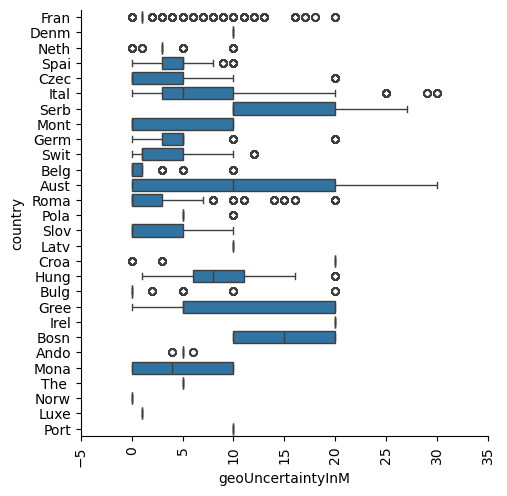

In [23]:
tmp = metadata_df.copy()
tmp.country = tmp.country.str.slice(0, 4)
fig = sns.catplot(y="country", x="geoUncertaintyInM", data=tmp.query('geoUncertaintyInM < 50'), kind="box")
fig.set_xticklabels(rotation=90)
plt.show()

In [30]:
for country in metadata_df.country.unique():
    na_count = metadata_df.query(f"country == '{country}'")['geoUncertaintyInM'].isna().sum()
    if na_count > 0:
        print(f"{country}: {na_count} missing values")
        metadata_df.loc[metadata_df.country == country, 'geoUncertaintyInM'] = metadata_df.query(f"country == '{country}'")['geoUncertaintyInM'].fillna(metadata_df.query(f"country == '{country}'")['geoUncertaintyInM'].median())

Poland: 4266 missing values
Czech Republic: 1124 missing values
Switzerland: 1323 missing values
Austria: 443 missing values
Slovakia: 1037 missing values
Romania: 202 missing values
Croatia: 1317 missing values
Hungary: 140 missing values


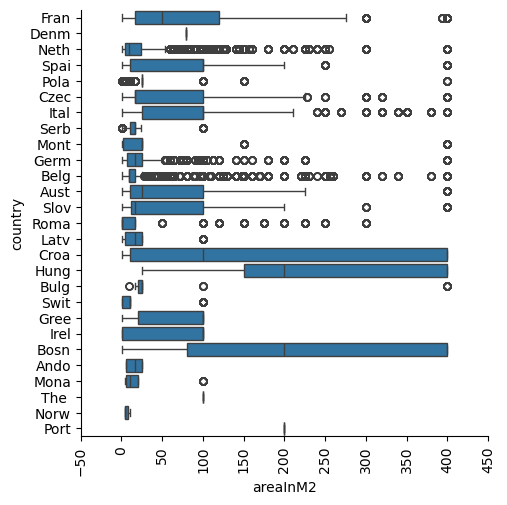

In [35]:
tmp = metadata_df.copy()
tmp.country = tmp.country.str.slice(0, 4)
fig = sns.catplot(y="country", x="areaInM2", data=tmp.query('areaInM2 < 410'), kind="box")
fig.set_xticklabels(rotation=90)
plt.show()

In [37]:
for country in metadata_df.country.unique():
    na_count = metadata_df.query(f"country == '{country}'")['areaInM2'].isna().sum()
    if na_count > 0:
        print(f"{country}: {na_count} missing values")
        metadata_df.loc[metadata_df.country == country, 'areaInM2'] = metadata_df.query(f"country == '{country}'")['areaInM2'].fillna(metadata_df.query(f"country == '{country}'")['areaInM2'].median())

France: 155943 missing values
Netherlands: 22134 missing values
Spain: 395 missing values
Poland: 24 missing values
Czech Republic: 45 missing values
Italy: 176 missing values
Germany: 614 missing values
Switzerland: 778 missing values
Belgium: 7099 missing values
Austria: 114 missing values
Croatia: 4 missing values
Bulgaria: 23 missing values
Greece: 214 missing values
Monaco: 10 missing values
Norway: 14 missing values
Luxembourg: 38 missing values


/home/startung/miniconda3/envs/tf/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [38]:
for country in metadata_df.country.unique():
    na_count = metadata_df.query(f"country == '{country}'")['areaInM2'].isna().sum()
    if na_count > 0:
        print(f"{country}: {na_count} missing values")

Luxembourg: 38 missing values


In [44]:
metadata_df.loc[metadata_df.country == 'Luxembourg', 'areaInM2'] = metadata_df.query(f"country == 'Luxembourg'")['areaInM2'].fillna(metadata_df.query(f"country == 'Belgium'")['areaInM2'].median())
metadata_df.query(f"country == 'Luxembourg'")['areaInM2'].median()

9.0

In [45]:
for country in metadata_df.country.unique():
    na_count = metadata_df.query(f"country == '{country}'")['areaInM2'].isna().sum()
    if na_count > 0:
        print(f"{country}: {na_count} missing values")

In [60]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(metadata_df[['region']])
print(transformed.toarray())
print(list(map(lambda x: "region_"+x, ohe.categories_[0])))

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['region_ALPINE', 'region_ATLANTIC', 'region_BLACK SEA', 'region_BOREAL', 'region_CONTINENTAL', 'region_MEDITERRANEAN', 'region_PANNONIAN', 'region_STEPPIC']


In [76]:
metadata_df['country'].isna().sum()

0

In [84]:
transformer = make_column_transformer((OneHotEncoder(dtype=int, sparse_output=False), ['region']), remainder='passthrough', verbose_feature_names_out=False)

transformed = transformer.fit_transform(metadata_df)
metadata_region_ohe_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names_out(metadata_df.columns)
)
metadata_region_ohe_df.head()

,region_ALPINE,region_ATLANTIC,region_BLACK SEA,region_BOREAL,region_CONTINENTAL,region_MEDITERRANEAN,region_PANNONIAN,region_STEPPIC,lon,lat,year,geoUncertaintyInM,areaInM2,country,speciesId,surveyId,speciesId_count
0,0,0,0,0,0,1,0,0,3.099038,43.134956,2021,5.0,100.0,France,6874,212,16
1,0,0,0,0,0,1,0,0,3.099038,43.134956,2021,5.0,100.0,France,476,212,16
2,0,0,0,0,0,1,0,0,3.099038,43.134956,2021,5.0,100.0,France,11157,212,16
3,0,0,0,0,0,1,0,0,3.099038,43.134956,2021,5.0,100.0,France,8784,212,16
4,0,0,0,0,0,1,0,0,3.099038,43.134956,2021,5.0,100.0,France,4530,212,16


In [85]:
transformer = make_column_transformer((OneHotEncoder(dtype=int, sparse_output=False), ['country']), remainder='passthrough', verbose_feature_names_out=False)

transformed = transformer.fit_transform(metadata_region_ohe_df)
metadata_region_country_ohe_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names_out(metadata_region_ohe_df.columns)
)
metadata_region_country_ohe_df.head()

,country_Andorra,country_Austria,country_Belgium,country_Bosnia and Herzegovina,country_Bulgaria,country_Croatia,country_Czech Republic,country_Denmark,country_France,country_Germany,...,region_PANNONIAN,region_STEPPIC,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId,surveyId,speciesId_count
0,0,0,0,0,0,0,0,0,1,0,...,0,0,3.099038,43.134956,2021,5.0,100.0,6874,212,16
1,0,0,0,0,0,0,0,0,1,0,...,0,0,3.099038,43.134956,2021,5.0,100.0,476,212,16
2,0,0,0,0,0,0,0,0,1,0,...,0,0,3.099038,43.134956,2021,5.0,100.0,11157,212,16
3,0,0,0,0,0,0,0,0,1,0,...,0,0,3.099038,43.134956,2021,5.0,100.0,8784,212,16
4,0,0,0,0,0,0,0,0,1,0,...,0,0,3.099038,43.134956,2021,5.0,100.0,4530,212,16


In [86]:
transformer = make_column_transformer((OneHotEncoder(dtype=int, sparse_output=False), ['speciesId']), remainder='passthrough', verbose_feature_names_out=False)

transformed = transformer.fit_transform(metadata_region_country_ohe_df)
metadata_region_country_species_ohe_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names_out(metadata_region_country_ohe_df.columns)
)
metadata_region_country_species_ohe_df.head()

,speciesId_2,speciesId_3,speciesId_4,speciesId_7,speciesId_9,speciesId_10,speciesId_12,speciesId_14,speciesId_15,speciesId_16,...,region_MEDITERRANEAN,region_PANNONIAN,region_STEPPIC,lon,lat,year,geoUncertaintyInM,areaInM2,surveyId,speciesId_count
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3.099038,43.134956,2021,5.0,100.0,212,16
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3.099038,43.134956,2021,5.0,100.0,212,16
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3.099038,43.134956,2021,5.0,100.0,212,16
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3.099038,43.134956,2021,5.0,100.0,212,16
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3.099038,43.134956,2021,5.0,100.0,212,16


In [90]:
metadata_region_country_species_ohe_df.groupby('surveyId').max()

,speciesId_2,speciesId_3,speciesId_4,speciesId_7,speciesId_9,speciesId_10,speciesId_12,speciesId_14,speciesId_15,speciesId_16,...,region_CONTINENTAL,region_MEDITERRANEAN,region_PANNONIAN,region_STEPPIC,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId_count
surveyId,,,,,,,,,,,,,,,,,,,,,
212,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,3.099038,43.134956,2021,5.0,100.0,16
222,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,9.88456,56.91214,2017,10.0,79.0,5
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.40259,43.50563,2018,1.0,50.0,6
333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.51736,45.80643,2017,1.0,50.0,9
590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.028387,51.601834,2017,3.0,4.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919553,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,10.32799,57.30585,2018,10.0,79.0,11
3919592,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,15.0039,55.09017,2017,10.0,707.0,4
3919620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8.93506,55.4615,2018,10.0,79.0,12
